In [ ]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from src.core import DataProcessor

In [8]:
data_processor = DataProcessor(data="BMK_2018.csv")
data_processor

ValueError: Invalid URL: https://

In [10]:
os.environ

environ{'HBI_WORKSPACE': 'false',
        'JUPYTER_SERVER_ROOT': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/zeusmlh15-gpu/code',
        'USER': 'azureuser',
        'MKL_THREADING_LAYER': 'GNU',
        'CI_WORKSPACE': 'ccldatascience-ml-ws',
        'SHLVL': '2',
        'LD_LIBRARY_PATH': '/opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/intel64/lib:/opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/mic/lib:/opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/intel64/lib:/opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/mic/lib',
        'HOME': '/home/azureuser',
        'CONDA_SHLVL': '2',
        'OLDPWD': '/home/azureuser/.vscode-server/bin/903b1e9d8990623e3d7da1df3d33db3e42d80eda',
        'OBO_ENDPOINT': 'http://127.0.0.1:46808/OBO/token',
        'CI_LOCAL_UBUNTU_USER': 'azureuser',
        'AZURE_EXTENSION_DIR': '/opt/az/extensions',
        '_CE_M': '',
        'PYXTERM_DIMENSIONS': '80x25',
        'DEFAULT_IDENTITY_CLIENT_ID': 'clientid',
      

In [167]:
if not os.path.exists("./data/bmk2018.pkl"):
    data = blob.load_csv_from_azure_storage(blob_name='BMK_2018.csv')
    # data['RaterType'] = data['RaterType'].str.lower()

    if not os.path.exists("./data"):
        os.mkdir("./data")
    with open('./data/bmk2018.pkl', 'wb') as pkl:
        pickle.dump(data, pkl, protocol=pickle.HIGHEST_PROTOCOL)
else:
    try:
        with open('./data/bmk2018.pkl', 'rb') as pkl:
            data = pickle.load(pkl)
    except EOFError:
        print("Error: End of file reached unexpectedly. Check for file corruption or empty file.")
    except FileNotFoundError:
        print("Error: File not found. Verify the file path.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [168]:
rater_count = count_raters(data)
rater_count

RaterType
Boss             1.0
Direct Report    3.0
Other            1.0
Peer             4.0
Self             1.0
Superior         1.0
dtype: float64

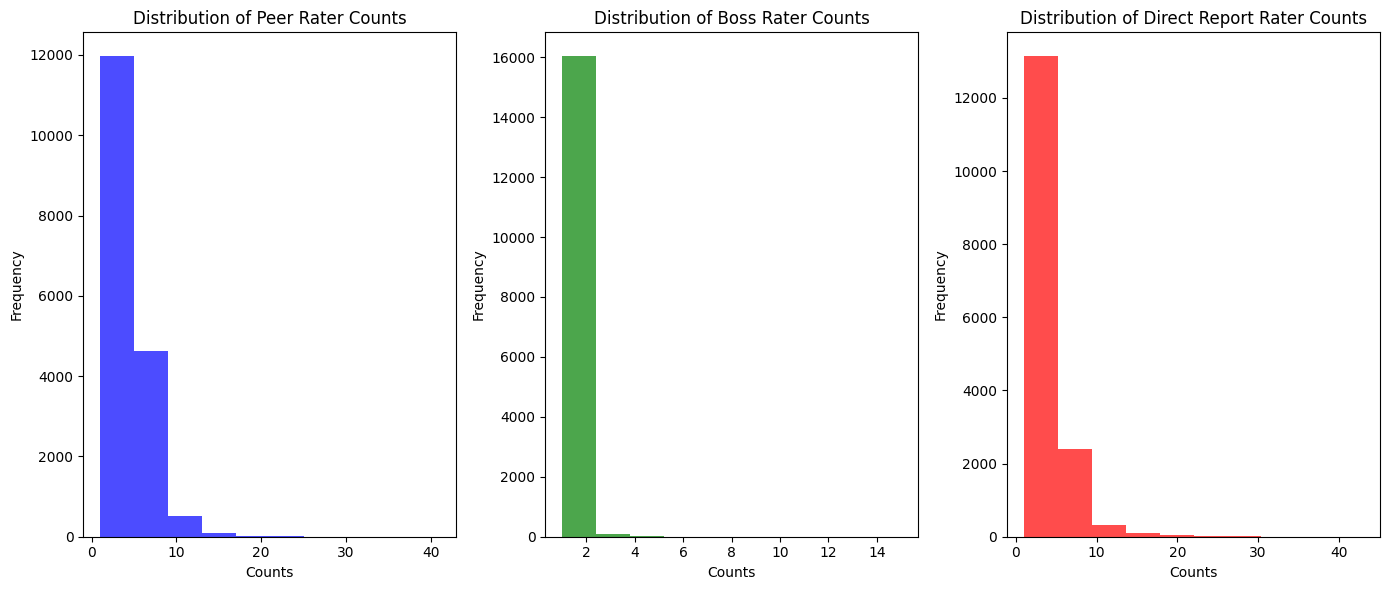

In [169]:
select_data = data[["ESI_Key", "RaterType"]]
peer_counts = select_data[select_data["RaterType"]
                          == "Peer"].groupby("ESI_Key").size()
boss_counts = select_data[select_data["RaterType"]
                          == "Boss"].groupby("ESI_Key").size()
direct_report_counts = select_data[select_data["RaterType"]
                                   == "Direct Report"].groupby("ESI_Key").size()

# Plotting
plt.figure(figsize=(14, 6))

# Histogram for peer counts
plt.subplot(1, 3, 1)  # 1 row, 3 cols, 1st subplot
plt.hist(peer_counts, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Peer Rater Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')


# Histogram for boss counts
plt.subplot(1, 3, 2)  # 1 row, 3 cols, 2nd subplot
plt.hist(boss_counts, bins=10, color='green', alpha=0.7)
plt.title('Distribution of Boss Rater Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')

# Histogram for direct report counts
plt.subplot(1, 3, 3)  # 1 row, 3 cols, 3rd subplot
plt.hist(direct_report_counts, bins=10, color='red', alpha=0.7)
plt.title('Distribution of Direct Report Rater Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [170]:
print("Peer: ", peer_counts.min(), peer_counts.max())
print("Boss: ", boss_counts.min(), boss_counts.max())
print("Direct Report: ", direct_report_counts.min(), direct_report_counts.max())

Peer:  1 41
Boss:  1 15
Direct Report:  1 43


In [171]:
# Group by 'ESI_Key' and count unique 'RaterType' values
unique_rater_counts = data.groupby("ESI_Key")["RaterType"].nunique()

# Get the `ESI_Key` of self raters with more than 4 raters
esi_full_raters = unique_rater_counts[unique_rater_counts >= 4]

data = data[data["ESI_Key"].isin(esi_full_raters.index)]

In [172]:
data["RaterType"].unique()

# there are Superior and Other raters that is not important for the work. Removing it
data = data[~data["RaterType"].isin(['Superior', 'Other'])]

In [173]:
demo_cols = [
    "Age",
    "Race",
    "OrganizationSector",
    "OrganizationType",
    "RaterType",
    "OrganizationLevel",
    "Gender"
]

In [174]:
# all the items cols
items_cols = ["ESI_Key", "BMK_S01_Strategic", "BMK_S02_Quick", "BMK_S03_Decisive", "BMK_S04_Change", "BMK_S05_Leading",
              "BMK_S06_Confront", "BMK_S07_Participative", "BMK_S08_Build", "BMK_S09_Compassion", "BMK_S10_Putting", "BMK_S11_Respect"]

In [175]:
# real_data[(real_data["ESI_Key"] == 4421981) & (real_data["RaterType"] == "Direct Report")]
# demo_cols + items_cols

In [176]:
real_data = data.loc[:, demo_cols + items_cols]

In [177]:
df_self = real_data[real_data["RaterType"] == "Self"].drop_duplicates(
    subset=["ESI_Key"], keep="last")
df_self = df_self[items_cols]
df_self

,ESI_Key,BMK_S01_Strategic,BMK_S02_Quick,BMK_S03_Decisive,BMK_S04_Change,BMK_S05_Leading,BMK_S06_Confront,BMK_S07_Participative,BMK_S08_Build,BMK_S09_Compassion,BMK_S10_Putting,BMK_S11_Respect
7,4147942,4.375,4.333333,4.000000,4.555556,4.307692,4.833333,4.222222,3.857143,3.833333,4.333333,4.25
12,7365679,4.125,4.666667,4.000000,3.555556,3.923077,3.500000,3.555556,3.714286,4.166667,3.666667,3.75
43,7365689,3.625,3.333333,3.666667,3.555556,4.076923,3.000000,3.777778,3.166667,4.000000,4.000000,4.50
54,7365676,5.000,5.000000,5.000000,4.777778,4.846154,4.666667,5.000000,5.000000,4.833333,4.666667,5.00
72,7365677,3.625,4.000000,3.666667,3.666667,3.692308,3.000000,4.000000,4.142857,4.000000,4.000000,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...
227862,7669708,4.250,4.000000,3.666667,4.222222,4.000000,3.800000,4.444444,4.142857,3.666667,4.000000,4.50
227863,7669710,3.750,4.000000,3.333333,3.888889,3.769231,2.333333,4.111111,4.000000,3.500000,4.000000,4.00
227864,7669709,3.625,4.000000,2.333333,3.666667,3.769231,2.833333,4.333333,4.000000,4.000000,4.000000,5.00
227928,7667147,4.750,3.333333,4.666667,4.888889,4.769231,4.666667,4.777778,5.000000,5.000000,5.000000,5.00


In [178]:
df_others = real_data[real_data["RaterType"] != "Self"]

In [179]:
df_others[["ESI_Key", "RaterType"]].groupby(
    ["ESI_Key", "RaterType"]).value_counts()

ESI_Key  RaterType    
4147942  Boss             2
         Direct Report    5
         Peer             3
4374574  Boss             1
         Peer             1
                         ..
7669710  Direct Report    6
         Peer             5
7670253  Boss             1
         Direct Report    3
         Peer             5
Name: count, Length: 47814, dtype: int64

In [180]:

# After unstacking, the columns will be multi-level, where the top level is the original columns
# and the second level is the 'RaterType'. You might want to flatten this for easier usage.
# Flatten the column names if necessary. Here's one way to do it:

In [181]:
df_others = df_others.groupby(["ESI_Key", "RaterType"])[items_cols[1:]].mean()
# df_others[["ESI_Key","RaterType"]].groupby(["ESI_Key", "RaterType"]).value_counts()
df_others = df_others.unstack(level='RaterType')
df_others.columns = ['{}_{}'.format(col[0], col[1])
                     for col in df_others.columns]
# df_others

In [182]:
real_data = pd.merge(df_self, df_others, on="ESI_Key", how="left")
# real_data

In [183]:
real_data.columns = [c.replace(' ', '_') for c in real_data.columns]
real_data.columns

Index(['ESI_Key', 'BMK_S01_Strategic', 'BMK_S02_Quick', 'BMK_S03_Decisive',
       'BMK_S04_Change', 'BMK_S05_Leading', 'BMK_S06_Confront',
       'BMK_S07_Participative', 'BMK_S08_Build', 'BMK_S09_Compassion',
       'BMK_S10_Putting', 'BMK_S11_Respect', 'BMK_S01_Strategic_Boss',
       'BMK_S01_Strategic_Direct_Report', 'BMK_S01_Strategic_Peer',
       'BMK_S02_Quick_Boss', 'BMK_S02_Quick_Direct_Report',
       'BMK_S02_Quick_Peer', 'BMK_S03_Decisive_Boss',
       'BMK_S03_Decisive_Direct_Report', 'BMK_S03_Decisive_Peer',
       'BMK_S04_Change_Boss', 'BMK_S04_Change_Direct_Report',
       'BMK_S04_Change_Peer', 'BMK_S05_Leading_Boss',
       'BMK_S05_Leading_Direct_Report', 'BMK_S05_Leading_Peer',
       'BMK_S06_Confront_Boss', 'BMK_S06_Confront_Direct_Report',
       'BMK_S06_Confront_Peer', 'BMK_S07_Participative_Boss',
       'BMK_S07_Participative_Direct_Report', 'BMK_S07_Participative_Peer',
       'BMK_S08_Build_Boss', 'BMK_S08_Build_Direct_Report',
       'BMK_S08_Build_Peer

In [184]:
# real_data["ESI_Key"] = real_data["ESI_Key"].astype('category')
# real_data #.groupby(["ESI_Key"]).count()

### Only use selected columns

This will consider FormActualKey as primary key

In [1]:
# find numeric columns

numeric_cols_df = real_data.select_dtypes(include=[np.number])

NameError: name 'real_data' is not defined

In [186]:
correlation_matrix = numeric_cols_df[2:].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,ESI_Key,BMK_S01_Strategic,BMK_S02_Quick,BMK_S03_Decisive,BMK_S04_Change,BMK_S05_Leading,BMK_S06_Confront,BMK_S07_Participative,BMK_S08_Build,BMK_S09_Compassion,BMK_S10_Putting,BMK_S11_Respect,BMK_S01_Strategic_Boss,BMK_S01_Strategic_Direct_Report,BMK_S01_Strategic_Peer,BMK_S02_Quick_Boss,BMK_S02_Quick_Direct_Report,BMK_S02_Quick_Peer,BMK_S03_Decisive_Boss,BMK_S03_Decisive_Direct_Report,BMK_S03_Decisive_Peer,BMK_S04_Change_Boss,BMK_S04_Change_Direct_Report,BMK_S04_Change_Peer,BMK_S05_Leading_Boss,BMK_S05_Leading_Direct_Report,BMK_S05_Leading_Peer,BMK_S06_Confront_Boss,BMK_S06_Confront_Direct_Report,BMK_S06_Confront_Peer,BMK_S07_Participative_Boss,BMK_S07_Participative_Direct_Report,BMK_S07_Participative_Peer,BMK_S08_Build_Boss,BMK_S08_Build_Direct_Report,BMK_S08_Build_Peer,BMK_S09_Compassion_Boss,BMK_S09_Compassion_Direct_Report,BMK_S09_Compassion_Peer,BMK_S10_Putting_Boss,BMK_S10_Putting_Direct_Report,BMK_S10_Putting_Peer,BMK_S11_Respect_Boss,BMK_S11_Respect_Direct_Report,BMK_S11_Respect_Peer
ESI_Key,1.000000,0.055029,0.015106,0.025912,0.043430,0.058119,0.029210,0.049593,0.053102,0.038448,0.037014,0.009151,0.082702,0.091959,0.109570,0.037171,0.044018,0.055717,0.047909,0.072115,0.081320,0.085910,0.090281,0.112665,0.086435,0.089734,0.107306,0.070563,0.085460,0.089809,0.076386,0.082027,0.102706,0.094102,0.083984,0.106285,0.062543,0.059768,0.081606,0.039347,0.052566,0.065364,0.039155,0.062862,0.060848
BMK_S01_Strategic,0.055029,1.000000,0.524712,0.549342,0.675176,0.657118,0.512293,0.542009,0.603135,0.448031,0.362729,0.419037,0.196397,0.164528,0.184231,0.142719,0.111885,0.121834,0.181161,0.160740,0.186236,0.154731,0.127007,0.137791,0.147749,0.115823,0.125420,0.162144,0.117460,0.143606,0.096522,0.080541,0.079581,0.099089,0.090096,0.085101,0.095801,0.079337,0.074401,0.053153,0.045599,0.051120,0.076750,0.075900,0.075545
BMK_S02_Quick,0.015106,0.524712,1.000000,0.430093,0.471455,0.434060,0.317078,0.347253,0.382529,0.301333,0.244394,0.315727,0.051262,0.094358,0.069636,0.165540,0.185487,0.178408,0.086036,0.120206,0.112647,0.025826,0.068377,0.041422,0.013366,0.050897,0.031027,0.035941,0.060910,0.052257,-0.036436,0.021817,-0.013379,-0.039223,0.025550,-0.007751,-0.015609,0.019447,-0.013546,-0.050764,-0.014362,-0.038105,0.004022,0.041793,0.014011
BMK_S03_Decisive,0.025912,0.549342,0.430093,1.000000,0.600187,0.556872,0.580723,0.381450,0.387938,0.294830,0.176507,0.325609,0.080567,0.089745,0.071233,0.084403,0.066009,0.058599,0.228466,0.210698,0.228674,0.067622,0.064076,0.048911,0.063645,0.059152,0.039083,0.153691,0.119367,0.139357,-0.037416,-0.007170,-0.042392,-0.040591,-0.011028,-0.041152,-0.008212,-0.013261,-0.032599,-0.068989,-0.053953,-0.070976,-0.017665,-0.002679,-0.021820
BMK_S04_Change,0.043430,0.675176,0.471455,0.600187,1.000000,0.749808,0.627148,0.747746,0.672778,0.586918,0.405104,0.535876,0.088092,0.127323,0.117303,0.053682,0.072574,0.060017,0.120500,0.146827,0.151667,0.119831,0.138682,0.134798,0.113948,0.128272,0.124865,0.142713,0.133253,0.142394,0.072894,0.108011,0.093130,0.071902,0.109256,0.094379,0.085978,0.099012,0.097296,0.055485,0.088333,0.084561,0.067268,0.093158,0.085528
BMK_S05_Leading,0.058119,0.657118,0.434060,0.556872,0.749808,1.000000,0.634782,0.708771,0.627597,0.626906,0.449967,0.517366,0.063518,0.147542,0.099457,0.030175,0.070192,0.039814,0.109752,0.172014,0.144907,0.098971,0.169894,0.119015,0.159822,0.199729,0.157186,0.144983,0.169675,0.145425,0.076620,0.156721,0.096251,0.039476,0.132122,0.074708,0.121094,0.148536,0.111147,0.047254,0.128813,0.077441,0.074839,0.118223,0.083418
BMK_S06_Confront,0.029210,0.512293,0.317078,0.580723,0.627148,0.634782,1.000000,0.461472,0.425099,0.400505,0.230799,0.351872,0.040349,0.103928,0.061347,-0.003753,0.027377,-0.004073,0.142424,0.179180,0.160817,0.078818,0.113767,0.075524,0.090388,0.116351,0.082871,0.234447,0.203986,0.208888,0.008640,0.068875,0.021617,-0.016238,0.040796,0.000286,0.039599,0.052866,0.028273,-0.024649,0.008571,-0.011702,0.023135,0.041952,0.015906
BMK_S07_Participative,

In [187]:

# real_data = data[[
#     "ESI_Key",
#     "RaterType",
#     "BMK_S01_Strategic",
#     "BMK_S02_Quick",
#     "BMK_S03_Decisive",
#     "BMK_S04_Change",
#     "BMK_S05_Leading",
#     "BMK_S06_Confront",
#     "BMK_S07_Participative",
#     "BMK_S08_Build",
#     "BMK_S09_Compassion",
#     "BMK_S10_Putting",
#     "BMK_S11_Respect"]]
# real_data

In [188]:
real_data.columns

Index(['ESI_Key', 'BMK_S01_Strategic', 'BMK_S02_Quick', 'BMK_S03_Decisive',
       'BMK_S04_Change', 'BMK_S05_Leading', 'BMK_S06_Confront',
       'BMK_S07_Participative', 'BMK_S08_Build', 'BMK_S09_Compassion',
       'BMK_S10_Putting', 'BMK_S11_Respect', 'BMK_S01_Strategic_Boss',
       'BMK_S01_Strategic_Direct_Report', 'BMK_S01_Strategic_Peer',
       'BMK_S02_Quick_Boss', 'BMK_S02_Quick_Direct_Report',
       'BMK_S02_Quick_Peer', 'BMK_S03_Decisive_Boss',
       'BMK_S03_Decisive_Direct_Report', 'BMK_S03_Decisive_Peer',
       'BMK_S04_Change_Boss', 'BMK_S04_Change_Direct_Report',
       'BMK_S04_Change_Peer', 'BMK_S05_Leading_Boss',
       'BMK_S05_Leading_Direct_Report', 'BMK_S05_Leading_Peer',
       'BMK_S06_Confront_Boss', 'BMK_S06_Confront_Direct_Report',
       'BMK_S06_Confront_Peer', 'BMK_S07_Participative_Boss',
       'BMK_S07_Participative_Direct_Report', 'BMK_S07_Participative_Peer',
       'BMK_S08_Build_Boss', 'BMK_S08_Build_Direct_Report',
       'BMK_S08_Build_Peer

#### Identify distribution of columns

In [189]:
# from src.distribution import test_col_distributions

# results = test_col_distributions(data=real_data.iloc[:,3:5])
# results

#### Create metadata

In [190]:
# df_self.dtypes

In [191]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

metadata.detect_from_dataframe(real_data)
data_dict = metadata.to_dict()

metadata.validate()

In [192]:
for c in real_data.columns[1:]:
    metadata.update_column(
        column_name=c,
        sdtype='numerical',
        computer_representation='Float')

In [193]:
# metadata.to_dict()

In [194]:
# # There are some column types that metadata discovered.
# incorrect_type_cols = real_data.columns[7:]
# incorrect_type_cols

### 1. Train synthesizer
##### Using Gaussian-Copula Synthesizer

In [195]:
from sdv.single_table import GaussianCopulaSynthesizer

In [196]:
# step 1: create the synthesizer
synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=True,
    # enforcing_rounding=False,
    numerical_distributions={

    },
    default_distribution='norm'
)

# step 2: Train the synthesizer
synthesizer.fit(real_data)

In [197]:
# step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=100)

In [198]:
real_data[0:100]

,ESI_Key,BMK_S01_Strategic,BMK_S02_Quick,BMK_S03_Decisive,BMK_S04_Change,BMK_S05_Leading,BMK_S06_Confront,BMK_S07_Participative,BMK_S08_Build,BMK_S09_Compassion,...,BMK_S08_Build_Peer,BMK_S09_Compassion_Boss,BMK_S09_Compassion_Direct_Report,BMK_S09_Compassion_Peer,BMK_S10_Putting_Boss,BMK_S10_Putting_Direct_Report,BMK_S10_Putting_Peer,BMK_S11_Respect_Boss,BMK_S11_Respect_Direct_Report,BMK_S11_Respect_Peer
0,4147942,4.375,4.333333,4.000000,4.555556,4.307692,4.833333,4.222222,3.857143,3.833333,...,4.380952,3.833333,4.000000,4.666667,4.333333,4.600000,4.666667,4.125,4.300000,4.833333
1,7365679,4.125,4.666667,4.000000,3.555556,3.923077,3.500000,3.555556,3.714286,4.166667,...,4.285714,5.000000,3.850000,4.291667,4.333333,4.000000,4.119048,5.000,4.258333,4.607143
2,7365689,3.625,3.333333,3.666667,3.555556,4.076923,3.000000,3.777778,3.166667,4.000000,...,4.857143,4.200000,4.500000,4.800000,4.666667,4.666667,5.000000,4.000,4.833333,5.000000
3,7365676,5.000,5.000000,5.000000,4.777778,4.846154,4.666667,5.000000,5.000000,4.833333,...,4.428571,5.000000,4.800000,4.333333,5.000000,4.333333,4.222222,5.000,4.694444,4.333333
4,7365677,3.625,4.000000,3.666667,3.666667,3.692308,3.000000,4.000000,4.142857,4.000000,...,4.000000,4.500000,4.444444,4.355556,4.666667,4.666667,4.666667,4.000,4.708333,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4397490,3.750,4.000000,3.000000,4.250000,3.666667,3.250000,4.333333,3.571429,4.166667,...,4.378571,4.333333,4.583333,4.458333,5.000000,4.416667,4.333333,5.000,4.625000,4.666667
96,4396794,3.625,3.333333,3.000000,3.888889,3.692308,3.166667,3.555556,3.571429,4.333333,...,4.063492,4.500000,4.558333,4.583333,5.000000,4.466667,4.666667,4.750,4.550000,4.583333
97,4396806,4.000,3.000000,4.000000,3.888889,3.692308,3.833333,3.333333,3.857143,3.333333,...,4.208333,4.666667,4.031250,4.333333,4.333333,3.541667,4.000000,4.750,4.562500,4.437500
98,4396792,4.250,4.666667,4.000000,4.888889,4.692308,4.000000,4.888889,4.857143,5.000000,...,4.339286,5.000000,4.916667,4.383333,5.000000,4.833333,4.500000,5.000,5.000000,4.437500


In [199]:
synth_numeric_df = synthetic_data.select_dtypes(include=[np.number])
synth_corr = synth_numeric_df.corr()

In [200]:
synth_corr.style.background_gradient(cmap='coolwarm')

,ESI_Key,BMK_S01_Strategic,BMK_S02_Quick,BMK_S03_Decisive,BMK_S04_Change,BMK_S05_Leading,BMK_S06_Confront,BMK_S07_Participative,BMK_S08_Build,BMK_S09_Compassion,BMK_S10_Putting,BMK_S11_Respect,BMK_S01_Strategic_Boss,BMK_S01_Strategic_Direct_Report,BMK_S01_Strategic_Peer,BMK_S02_Quick_Boss,BMK_S02_Quick_Direct_Report,BMK_S02_Quick_Peer,BMK_S03_Decisive_Boss,BMK_S03_Decisive_Direct_Report,BMK_S03_Decisive_Peer,BMK_S04_Change_Boss,BMK_S04_Change_Direct_Report,BMK_S04_Change_Peer,BMK_S05_Leading_Boss,BMK_S05_Leading_Direct_Report,BMK_S05_Leading_Peer,BMK_S06_Confront_Boss,BMK_S06_Confront_Direct_Report,BMK_S06_Confront_Peer,BMK_S07_Participative_Boss,BMK_S07_Participative_Direct_Report,BMK_S07_Participative_Peer,BMK_S08_Build_Boss,BMK_S08_Build_Direct_Report,BMK_S08_Build_Peer,BMK_S09_Compassion_Boss,BMK_S09_Compassion_Direct_Report,BMK_S09_Compassion_Peer,BMK_S10_Putting_Boss,BMK_S10_Putting_Direct_Report,BMK_S10_Putting_Peer,BMK_S11_Respect_Boss,BMK_S11_Respect_Direct_Report,BMK_S11_Respect_Peer
ESI_Key,1.000000,0.091739,0.091747,0.031910,-0.088468,0.042951,0.035850,-0.004881,-0.008012,-0.004799,-0.021034,0.068383,-0.034625,0.003904,0.024248,0.073610,0.015888,-0.043166,0.088166,0.019820,0.095619,0.037001,-0.052970,-0.051429,-0.011279,-0.011460,-0.088664,0.016358,0.011942,0.037543,-0.027042,0.026812,-0.113893,0.010929,-0.069075,-0.085296,0.036445,-0.019308,-0.129479,-0.049572,-0.159078,-0.130603,-0.018787,0.016900,-0.166504
BMK_S01_Strategic,0.091739,1.000000,0.299445,0.512361,0.582841,0.530590,0.437001,0.485161,0.597987,0.370795,0.418775,0.518295,0.170303,0.175159,0.011443,0.131518,-0.095873,-0.032192,0.171801,0.159472,0.056606,0.135594,0.068602,-0.102278,0.136387,0.096867,-0.038754,-0.054198,-0.005449,0.007415,0.189809,0.044676,-0.171963,0.066868,0.038884,-0.094984,0.142087,-0.008103,0.021723,0.089954,0.043033,-0.119909,0.190211,0.063441,0.003312
BMK_S02_Quick,0.091747,0.299445,1.000000,0.381868,0.318242,0.199525,0.237294,0.187438,0.266599,0.223628,0.181142,0.225559,0.012997,-0.039246,-0.135350,0.243786,0.143932,0.043550,0.176281,0.189605,0.010118,-0.003071,-0.062125,-0.129548,0.035596,0.000409,-0.129342,-0.001659,0.019000,-0.032850,-0.061831,-0.031004,-0.245469,-0.093887,-0.119543,-0.130753,0.007637,-0.107092,-0.143019,-0.121315,-0.185097,-0.111222,0.042316,-0.081551,-0.069886
BMK_S03_Decisive,0.031910,0.512361,0.381868,1.000000,0.546100,0.424270,0.559518,0.242832,0.367899,0.138947,0.223785,0.355328,0.015377,-0.003338,-0.125860,0.085379,-0.042793,-0.140604,0.146739,0.224610,0.073413,0.012896,-0.034173,-0.107181,-0.075194,-0.036377,-0.140839,-0.005715,-0.088975,-0.066736,0.009968,-0.067225,-0.255998,-0.048820,-0.088607,-0.132902,-0.022685,-0.138481,-0.198868,-0.186467,-0.152071,-0.148353,0.089271,-0.019875,-0.057518
BMK_S04_Change,-0.088468,0.582841,0.318242,0.546100,1.000000,0.719356,0.658710,0.722330,0.687840,0.520572,0.460947,0.677266,0.173389,0.120701,0.012773,0.164004,0.038393,-0.012695,0.205692,0.166299,0.090099,0.185780,0.105815,0.031222,0.170046,0.065807,0.064957,0.079969,0.063356,0.017758,0.142604,0.044333,-0.020052,0.157444,0.127830,-0.005202,0.172922,0.058547,0.105552,0.183947,0.135007,0.129662,0.244305,0.106378,0.134157
BMK_S05_Leading,0.042951,0.530590,0.199525,0.424270,0.719356,1.000000,0.603544,0.683891,0.577135,0.597554,0.457392,0.575284,0.065151,0.142057,0.057806,0.011168,0.140701,-0.053480,0.114625,0.181925,0.030398,0.066833,0.188484,0.015869,0.088064,0.170253,0.114109,-0.046275,0.095771,0.060185,0.089218,0.146922,0.021642,0.049266,0.152883,-0.014015,0.202379,0.211949,0.107066,0.165735,0.292397,0.127982,0.280831,0.257665,0.077992
BMK_S06_Confront,0.035850,0.437001,0.237294,0.559518,0.658710,0.603544,1.000000,0.414735,0.417403,0.337640,0.244108,0.446283,0.034795,0.039463,-0.022249,-0.000330,-0.066066,-0.074557,0.089313,0.134202,0.088180,0.121045,0.049743,-0.012803,0.081091,0.071222,0.063338,0.246627,0.118890,0.112208,0.062573,0.055102,-0.057515,0.039263,-0.034014,-0.096257,0.094925,0.046205,-0.015624,-0.061313,

In [201]:
from sdv.evaluation.multi_table import run_diagnostic, evaluate_quality
from sdv.evaluation.multi_table import get_column_plot

# 1. perform basic validity checks
diagnostic = run_diagnostic(real_data, synthetic_data, metadata)

# 2. measure the statistical similarity
quality_report = evaluate_quality(real_data, synthetic_data, metadata)

# 3. plot the data
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata,
    table_name='guests',
    column_name='amenities_fee'
)

fig.show()

ValueError: Multi table DiagnosticReport expects real and synthetic data to be dictionaries of pandas.DataFrame. If your real and synthetic data are pd.DataFrame, please use the single-table DiagnosticReport instead.

### 2. Train Synthesizer
#### Using CTGAN

In [ ]:
from sdv.single_table import CTGANSynthesizer

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
numeric_cols = real_data.select_dtypes(include=[np.number]).columns

In [ ]:
# normalize the data
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# real_data_norm = real_data.copy()
# real_data_norm[numeric_cols] = scaler.fit_transform(real_data[numeric_cols]).copy()

In [ ]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

metadata.detect_from_dataframe(real_data)
data_dict = metadata.to_dict()

metadata.validate()

In [ ]:
# metadata.to_dict()

In [ ]:
real_data

In [ ]:
model_name = "./data/bmk2018_ctgan_comp.pk"
if os.path.exists(model_name):
    synthesizer = CTGANSynthesizer.load(filepath=model_name)

else:
    synthesizer = CTGANSynthesizer(metadata,
                                   epochs=500,
                                   enforce_rounding=True,
                                   enforce_min_max_values=True,
                                   verbose=True,
                                   cuda=True)
    synthesizer.fit(real_data)

    synthesizer.save(filepath=model_name)

In [ ]:
synthesizer.get_loss_values()

In [ ]:
ctgan_data = synthesizer.sample(num_rows=15000)

In [ ]:
ctgan_data

In [ ]:
ctgan_data[2:]

In [153]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,BMK_S01_Strategic,BMK_S02_Quick,BMK_S03_Decisive,BMK_S04_Change,BMK_S05_Leading,BMK_S06_Confront,BMK_S07_Participative,BMK_S08_Build,BMK_S09_Compassion,BMK_S10_Putting,BMK_S11_Respect,BMK_S01_Strategic_Boss,BMK_S01_Strategic_Direct_Report,BMK_S01_Strategic_Peer,BMK_S02_Quick_Boss,BMK_S02_Quick_Direct_Report,BMK_S02_Quick_Peer,BMK_S03_Decisive_Boss,BMK_S03_Decisive_Direct_Report,BMK_S03_Decisive_Peer,BMK_S04_Change_Boss,BMK_S04_Change_Direct_Report,BMK_S04_Change_Peer,BMK_S05_Leading_Boss,BMK_S05_Leading_Direct_Report,BMK_S05_Leading_Peer,BMK_S06_Confront_Boss,BMK_S06_Confront_Direct_Report,BMK_S06_Confront_Peer,BMK_S07_Participative_Boss,BMK_S07_Participative_Direct_Report,BMK_S07_Participative_Peer,BMK_S08_Build_Boss,BMK_S08_Build_Direct_Report,BMK_S08_Build_Peer,BMK_S09_Compassion_Boss,BMK_S09_Compassion_Direct_Report,BMK_S09_Compassion_Peer,BMK_S10_Putting_Boss,BMK_S10_Putting_Direct_Report,BMK_S10_Putting_Peer,BMK_S11_Respect_Boss,BMK_S11_Respect_Direct_Report,BMK_S11_Respect_Peer
BMK_S01_Strategic,1.000000,0.524712,0.549342,0.675176,0.657118,0.512293,0.542009,0.603135,0.448031,0.362729,0.419037,0.196397,0.164528,0.184231,0.142719,0.111885,0.121834,0.181161,0.160740,0.186236,0.154731,0.127007,0.137791,0.147749,0.115823,0.125420,0.162144,0.117460,0.143606,0.096522,0.080541,0.079581,0.099089,0.090096,0.085101,0.095801,0.079337,0.074401,0.053153,0.045599,0.051120,0.076750,0.075900,0.075545
BMK_S02_Quick,0.524712,1.000000,0.430093,0.471455,0.434060,0.317078,0.347253,0.382529,0.301333,0.244394,0.315727,0.051262,0.094358,0.069636,0.165540,0.185487,0.178408,0.086036,0.120206,0.112647,0.025826,0.068377,0.041422,0.013366,0.050897,0.031027,0.035941,0.060910,0.052257,-0.036436,0.021817,-0.013379,-0.039223,0.025550,-0.007751,-0.015609,0.019447,-0.013546,-0.050764,-0.014362,-0.038105,0.004022,0.041793,0.014011
BMK_S03_Decisive,0.549342,0.430093,1.000000,0.600187,0.556872,0.580723,0.381450,0.387938,0.294830,0.176507,0.325609,0.080567,0.089745,0.071233,0.084403,0.066009,0.058599,0.228466,0.210698,0.228674,0.067622,0.064076,0.048911,0.063645,0.059152,0.039083,0.153691,0.119367,0.139357,-0.037416,-0.007170,-0.042392,-0.040591,-0.011028,-0.041152,-0.008212,-0.013261,-0.032599,-0.068989,-0.053953,-0.070976,-0.017665,-0.002679,-0.021820
BMK_S04_Change,0.675176,0.471455,0.600187,1.000000,0.749808,0.627148,0.747746,0.672778,0.586918,0.405104,0.535876,0.088092,0.127323,0.117303,0.053682,0.072574,0.060017,0.120500,0.146827,0.151667,0.119831,0.138682,0.134798,0.113948,0.128272,0.124865,0.142713,0.133253,0.142394,0.072894,0.108011,0.093130,0.071902,0.109256,0.094379,0.085978,0.099012,0.097296,0.055485,0.088333,0.084561,0.067268,0.093158,0.085528
BMK_S05_Leading,0.657118,0.434060,0.556872,0.749808,1.000000,0.634782,0.708771,0.627597,0.626906,0.449967,0.517366,0.063518,0.147542,0.099457,0.030175,0.070192,0.039814,0.109752,0.172014,0.144907,0.098971,0.169894,0.119015,0.159822,0.199729,0.157186,0.144983,0.169675,0.145425,0.076620,0.156721,0.096251,0.039476,0.132122,0.074708,0.121094,0.148536,0.111147,0.047254,0.128813,0.077441,0.074839,0.118223,0.083418
BMK_S06_Confront,0.512293,0.317078,0.580723,0.627148,0.634782,1.000000,0.461472,0.425099,0.400505,0.230799,0.351872,0.040349,0.103928,0.061347,-0.003753,0.027377,-0.004073,0.142424,0.179180,0.160817,0.078818,0.113767,0.075524,0.090388,0.116351,0.082871,0.234447,0.203986,0.208888,0.008640,0.068875,0.021617,-0.016238,0.040796,0.000286,0.039599,0.052866,0.028273,-0.024649,0.008571,-0.011702,0.023135,0.041952,0.015906
BMK_S07_Participative,0.542009,0.347253,0.381450,0.747746,0.708771,0.461472,1.000000,0.675148,0.660985,0.477098,0.566349,0.048730,0.106056,0.105084,0.010435,0.048607,0.038400,0.021687,0.080240,0.068144,0.099349,0.151076,0.142597,0.112548,0.150615,0.152571,0.075634,0.111491,0.102199,0.129443,0.176916,0.168926,0.107931,0.156342,0.156350,0.131713,0.157542,0.161864,0.106017,0.161751,0.157502,0.092643,0.122100,0.129833
BMK_S08_Build,0.603135,0.382529,0.387938,0.672778,0.627597,0.425099,0.675148,1.

In [154]:
ctgan_corr = ctgan_data.corr()
ctgan_corr.style.background_gradient(cmap='coolwarm')

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,ESI_Key,BMK_S01_Strategic,BMK_S02_Quick,BMK_S03_Decisive,BMK_S04_Change,BMK_S05_Leading,BMK_S06_Confront,BMK_S07_Participative,BMK_S08_Build,BMK_S09_Compassion,BMK_S10_Putting,BMK_S11_Respect,BMK_S01_Strategic_Boss,BMK_S01_Strategic_Direct_Report,BMK_S01_Strategic_Peer,BMK_S02_Quick_Boss,BMK_S02_Quick_Direct_Report,BMK_S02_Quick_Peer,BMK_S03_Decisive_Boss,BMK_S03_Decisive_Direct_Report,BMK_S03_Decisive_Peer,BMK_S04_Change_Boss,BMK_S04_Change_Direct_Report,BMK_S04_Change_Peer,BMK_S05_Leading_Boss,BMK_S05_Leading_Direct_Report,BMK_S05_Leading_Peer,BMK_S06_Confront_Boss,BMK_S06_Confront_Direct_Report,BMK_S06_Confront_Peer,BMK_S07_Participative_Boss,BMK_S07_Participative_Direct_Report,BMK_S07_Participative_Peer,BMK_S08_Build_Boss,BMK_S08_Build_Direct_Report,BMK_S08_Build_Peer,BMK_S09_Compassion_Boss,BMK_S09_Compassion_Direct_Report,BMK_S09_Compassion_Peer,BMK_S10_Putting_Boss,BMK_S10_Putting_Direct_Report,BMK_S10_Putting_Peer,BMK_S11_Respect_Boss,BMK_S11_Respect_Direct_Report,BMK_S11_Respect_Peer
ESI_Key,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BMK_S01_Strategic,nan,1.000000,0.421156,0.507712,0.576912,0.588700,0.535564,0.553229,0.573883,0.546038,0.391415,0.448226,-0.023655,0.043557,0.085992,-0.105398,-0.010405,0.077101,-0.008271,0.074318,0.118184,-0.005926,0.043186,0.105125,-0.030534,0.063655,0.082213,0.027764,0.070694,0.099396,-0.052125,0.049641,0.071338,-0.029399,0.054421,0.057945,-0.007975,0.021386,0.043922,-0.081038,0.079351,0.047708,-0.055545,-0.026009,0.042282
BMK_S02_Quick,nan,0.421156,1.000000,0.404868,0.441110,0.464579,0.422262,0.453289,0.436176,0.451169,0.301603,0.396345,-0.167231,0.036433,-0.025616,-0.191949,0.023313,0.009730,-0.111323,0.101959,0.003062,-0.153964,0.059213,-0.002895,-0.183369,0.070622,-0.006705,-0.091281,0.068015,0.017893,-0.193785,0.063018,-0.022277,-0.162845,0.042764,-0.041847,-0.143813,0.036705,-0.044425,-0.199682,0.067025,-0.042648,-0.161429,-0.004014,-0.058299
BMK_S03_Decisive,nan,0.507712,0.404868,1.000000,0.521003,0.517338,0.505944,0.483811,0.490511,0.478213,0.301220,0.392137,-0.100950,-0.062301,-0.129396,-0.128891,-0.082596,-0.099694,-0.048614,-0.005584,-0.060385,-0.091989,-0.046627,-0.109116,-0.122866,-0.040494,-0.140577,-0.002278,-0.011277,-0.082226,-0.126591,-0.056797,-0.151044,-0.125843,-0.071880,-0.152371,-0.085749,-0.101068,-0.174119,-0.164257,-0.051259,-0.155566,-0.133782,-0.148992,-0.165390
BMK_S04_Change,nan,0.576912,0.441110,0.521003,1.000000,0.627515,0.562657,0.587732,0.607389,0.572833,0.402067,0.471315,-0.031195,0.144106,0.097757,-0.112614,0.079164,0.085357,-0.014375,0.176389,0.117426,-0.020482,0.137211,0.101671,-0.030736,0.157265,0.083868,0.034773,0.156453,0.111766,-0.062902,0.137421,0.067730,-0.042139,0.137163,0.058235,-0.019011,0.104201,0.047377,-0.090508,0.147986,0.032172,-0.073869,0.058191,0.028286
BMK_S05_Leading,nan,0.588700,0.464579,0.517338,0.627515,1.000000,0.569412,0.606785,0.618958,0.584092,0.440514,0.519837,-0.052111,0.170965,0.133256,-0.139961,0.102509,0.134482,-0.045391,0.205701,0.162595,-0.032700,0.181025,0.139176,-0.051594,0.197172,0.124024,0.009381,0.198982,0.148611,-0.089719,0.183166,0.117434,-0.052754,0.180920,0.096704,-0.029586,0.156176,0.086255,-0.107920,0.206682,0.082787,-0.071985,0.100834,0.069934
BMK_S06_Confront,nan,0.535564,0.422262,0.505944,0.562657,0.569412,1.000000,0.536748,0.549758,0.532385,0.360825,0.445130,-0.084367,0.093200,0.014792,-0.136413,0.062067,0.027429,-0.055826,0.140373,0.069190,-0.068766,0.101192,0.023057,-0.092490,0.122698,0.004461,0.002253,0.139877,0.043539,-0.118597,0.102613,-0.003344,-0.096879,0.092559,-0.021556,-0.072823,0.059722,-0.031506,-0.142009,0.111911,-0.032495,-0.119091,0.018424,-0.035494
BMK_S07_Participative,nan,0.553229,0.453289,0.483811,0.587732,0.606785,0.536748,1.000000,0.590140,0.572267,0.424157,0.491626,-0.087910,0.149108,0.112228,-0.180400,0.089034,0.110508,-0.077297,0.201969,0.1260

In [157]:
corr_diff = ctgan_corr - correlation_matrix
corr_diff.style.background_gradient(cmap="coolwarm")

,BMK_S01_Strategic,BMK_S01_Strategic_Boss,BMK_S01_Strategic_Direct_Report,BMK_S01_Strategic_Peer,BMK_S02_Quick,BMK_S02_Quick_Boss,BMK_S02_Quick_Direct_Report,BMK_S02_Quick_Peer,BMK_S03_Decisive,BMK_S03_Decisive_Boss,BMK_S03_Decisive_Direct_Report,BMK_S03_Decisive_Peer,BMK_S04_Change,BMK_S04_Change_Boss,BMK_S04_Change_Direct_Report,BMK_S04_Change_Peer,BMK_S05_Leading,BMK_S05_Leading_Boss,BMK_S05_Leading_Direct_Report,BMK_S05_Leading_Peer,BMK_S06_Confront,BMK_S06_Confront_Boss,BMK_S06_Confront_Direct_Report,BMK_S06_Confront_Peer,BMK_S07_Participative,BMK_S07_Participative_Boss,BMK_S07_Participative_Direct_Report,BMK_S07_Participative_Peer,BMK_S08_Build,BMK_S08_Build_Boss,BMK_S08_Build_Direct_Report,BMK_S08_Build_Peer,BMK_S09_Compassion,BMK_S09_Compassion_Boss,BMK_S09_Compassion_Direct_Report,BMK_S09_Compassion_Peer,BMK_S10_Putting,BMK_S10_Putting_Boss,BMK_S10_Putting_Direct_Report,BMK_S10_Putting_Peer,BMK_S11_Respect,BMK_S11_Respect_Boss,BMK_S11_Respect_Direct_Report,BMK_S11_Respect_Peer,ESI_Key
BMK_S01_Strategic,0.000000,-0.220052,-0.120971,-0.098239,-0.103556,-0.248117,-0.122290,-0.044732,-0.041630,-0.189432,-0.086422,-0.068052,-0.098264,-0.160657,-0.083821,-0.032667,-0.068417,-0.178283,-0.052169,-0.043207,0.023271,-0.134380,-0.046766,-0.044209,0.011221,-0.148648,-0.030900,-0.008244,-0.029253,-0.128487,-0.035675,-0.027155,0.098007,-0.103775,-0.057951,-0.030479,0.028687,-0.134192,0.033753,-0.003412,0.029189,-0.132295,-0.101909,-0.033262,nan
BMK_S01_Strategic_Boss,-0.220052,0.000000,-0.109731,-0.084478,-0.218493,-0.085815,-0.103667,-0.112363,-0.181517,-0.085706,-0.144217,-0.077059,-0.119287,-0.121544,-0.105306,-0.107269,-0.115629,-0.111063,-0.066515,-0.102644,-0.124716,-0.060968,-0.018813,-0.098177,-0.136640,-0.057657,-0.078681,-0.037573,-0.146922,-0.052609,-0.061391,-0.048134,-0.132325,0.090239,-0.040096,0.050987,-0.097362,0.083237,-0.084960,0.012746,-0.200894,0.056772,-0.010123,0.012334,nan
BMK_S01_Strategic_Direct_Report,-0.120971,-0.109731,0.000000,0.051391,-0.057925,-0.165301,-0.113564,0.047378,-0.152046,-0.127328,-0.098669,0.076332,0.016783,-0.102903,-0.163672,0.013000,0.023423,-0.083486,-0.134534,0.030807,-0.010728,-0.135475,-0.055696,0.080645,0.043052,-0.140541,-0.100637,0.075731,0.000392,-0.099899,-0.140613,0.053354,0.025802,-0.054379,-0.012566,0.140502,0.057034,-0.036363,0.053888,0.095998,0.026822,-0.026364,-0.006006,0.098529,nan
BMK_S01_Strategic_Peer,-0.098239,-0.084478,0.051391,0.000000,-0.095252,-0.157702,0.046911,-0.121204,-0.200628,-0.095171,0.053992,-0.119273,-0.019546,-0.045287,0.098886,-0.154047,0.033799,-0.020841,0.121013,-0.117706,-0.046554,-0.124049,0.103071,-0.056435,0.007144,-0.061237,0.115529,-0.067510,-0.038404,-0.064843,0.119018,-0.120564,0.043206,0.042586,0.184894,0.044758,0.071202,0.024317,0.200880,0.049870,0.033705,0.042694,0.194870,0.045066,nan
BMK_S02_Quick,-0.103556,-0.218493,-0.057925,-0.095252,0.000000,-0.357490,-0.162175,-0.168678,-0.025225,-0.197359,-0.018247,-0.109585,-0.030345,-0.179790,-0.009164,-0.044317,0.030519,-0.196734,0.019725,-0.037732,0.105184,-0.127222,0.007105,-0.034364,0.106037,-0.157349,0.041201,-0.008899,0.053646,-0.123622,0.017214,-0.034096,0.149836,-0.128203,0.017258,-0.030879,0.057209,-0.148919,0.081387,-0.004543,0.080618,-0.165450,-0.045807,-0.072310,nan
BMK_S02_Quick_Boss,-0.248117,-0.085815,-0.165301,-0.157702,-0.357490,0.000000,-0.224445,-0.317147,-0.213294,-0.061768,-0.216868,-0.189105,-0.166296,-0.040707,-0.160880,-0.211182,-0.170136,-0.052774,-0.132236,-0.200620,-0.132661,0.035907,-0.081827,-0.196770,-0.190836,0.047028,-0.125801,-0.123428,-0.180146,0.049493,-0.126459,-0.122339,-0.195728,0.111754,-0.104623,-0.054673,-0.158148,0.150215,-0.153664,-0.075143,-0.277561,0.090938,-0.092478,-0.105517,nan
BMK_S02_Quick_Direct_Report,-0.122290,-0.103667,-0.113564,0.046911,-0.162175,-0.224445,0.000000,-0.051952,-0.148606,-0.148422,-0.052584,0.036812,0.006590,-0.102826,-0.069795,0.016521,0.032317,-0.064330,-0.032662,0.047304,0.034690,-0.129828,0.030029,0.078676,0.040427,-0.130967

In [159]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=ctgan_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 648.57it/s]

Overall Score: 98.89%

Properties:
- Data Validity: 97.78%
- Data Structure: 100.0%


In [165]:
diagnostic.get_details(property_name='Data Validity')

,Column,Metric,Score
0,ESI_Key,KeyUniqueness,0.0
1,BMK_S01_Strategic,BoundaryAdherence,1.0
2,BMK_S02_Quick,BoundaryAdherence,1.0
3,BMK_S03_Decisive,BoundaryAdherence,1.0
4,BMK_S04_Change,BoundaryAdherence,1.0
5,BMK_S05_Leading,BoundaryAdherence,1.0
6,BMK_S06_Confront,BoundaryAdherence,1.0
7,BMK_S07_Participative,BoundaryAdherence,1.0
8,BMK_S08_Build,BoundaryAdherence,1.0
9,BMK_S09_Compassion,BoundaryAdherence,1.0


In [160]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data_norm,
    ctgan_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 990/990 [00:06<00:00, 153.61it/s]

Overall Score: 47.74%

Properties:
- Column Shapes: 0.11%
- Column Pair Trends: 95.38%


In [164]:
quality_report.get_details('Column Shapes')
quality_report.get_details('Data Validity')

ValueError: Invalid property name 'Data Validity'. Valid property names are 'Column Shapes', 'Column Pair Trends'.

#### Correlation

In [161]:
from sdmetrics.column_pairs import CorrelationSimilarity

CorrelationSimilarity.compute(
    real_data=real_data[['BMK_S15_SelfAware', 'BMK_D03_DiffChange']],
    synthetic_data=ctgan_data[['BMK_S15_SelfAware', 'BMK_D03_DiffChange']],
    coefficient='Pearson'
)

KeyError: "None of [Index(['BMK_S15_SelfAware', 'BMK_D03_DiffChange'], dtype='object')] are in the [columns]"

In [162]:
from sdmetrics.column_pairs import ContingencySimilarity

ContingencySimilarity.compute(
    real_data=real_data[["ESI_Key", "FormActualKey", "BMK_S01_Strategic", "BMK_S02_Quick", "BMK_S03_Decisive", "BMK_S04_Change", "BMK_S05_Leading", "BMK_S06_Confront", "BMK_S07_Participative", "BMK_S08_Build", "BMK_S09_Compassion",
                         "BMK_S10_Putting", "BMK_S11_Respect", "BMK_S12_Taking", "BMK_S13_Composure", "BMK_S14_Balance", "BMK_S15_SelfAware", "BMK_S16_Career", "BMK_D01_Interper", "BMK_D02_DiffBuild", "BMK_D03_DiffChange", "BMK_D04_Failure", "BMK_D05_Narrow"]],
    synthetic_data=ctgan_data[["ESI_Key", "FormActualKey", "BMK_S01_Strategic", "BMK_S02_Quick", "BMK_S03_Decisive", "BMK_S04_Change", "BMK_S05_Leading", "BMK_S06_Confront", "BMK_S07_Participative", "BMK_S08_Build", "BMK_S09_Compassion",
                               "BMK_S10_Putting", "BMK_S11_Respect", "BMK_S12_Taking", "BMK_S13_Composure", "BMK_S14_Balance", "BMK_S15_SelfAware", "BMK_S16_Career", "BMK_D01_Interper", "BMK_D02_DiffBuild", "BMK_D03_DiffChange", "BMK_D04_Failure", "BMK_D05_Narrow"]]
)

KeyError: "['FormActualKey', 'BMK_S12_Taking', 'BMK_S13_Composure', 'BMK_S14_Balance', 'BMK_S15_SelfAware', 'BMK_S16_Career', 'BMK_D01_Interper', 'BMK_D02_DiffBuild', 'BMK_D03_DiffChange', 'BMK_D04_Failure', 'BMK_D05_Narrow'] not in index"

In [48]:
real_data[['BMK_S02_Quick']].corrwith(ctgan_data[['BMK_S02_Quick']])

BMK_S02_Quick    0.000605
dtype: float64

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize an empty correlation matrix
correlation_matrix = pd.DataFrame()

# Iterate through columns in df1 and calculate correlation with columns in df2
for column in real_data.columns:
    correlations = real_data[column].corr(ctgan_data)
    correlation_matrix[column] = correlations

# Create a heatmap for visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add labels and title
plt.title('Correlation Between Columns in df1 and Columns in df2')
plt.xlabel('df2 Columns')
plt.ylabel('df1 Columns')

# Show the plot
plt.show()

ValueError: operands could not be broadcast together with shapes (500,) (500,23) 

#### Visualization

In [33]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=ctgan_data,
    metadata=metadata,
    plot_type='distplot',
    column_name='BMK_D02_DiffBuild'
)

fig.show()

In [34]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=ctgan_data,
    metadata=metadata,
    plot_type='bar',
    column_name='BMK_D02_DiffBuild'
)

fig.show()